# Working with Modules


All the code we have seen so far was self-contained in the sense that all relevant functionality was defined within the file / Jupyer Notebook.
While it is great to have everything in one place - it clearly does not scale. \n
As soon as we have more complex code, the notebooks become very long and it becomes harder and harder to keep track of what was defined where.
It also means the code can only be re-used with some difficulty - we would have to copy & paste code from here to there, and so on. Once we find a bug, we would have to fix it everywhere (or, more likely, forget to do that.)

Python supports "modules" which are essentially files ending in ```.py``` that hold functions, classes, generators, decorators, etc. that we can then use and re-use in many other pieces of code or in Jupyter Notebooks.

> **Best Practice**: Code-refactoring
>
> When we have developed a useful function, class, etc. it is a good practice to put this into its own separate file.
> This allows to use it more widely, it is easier to debug, and keeps the code clutter-free. It also makes it easier to clean up the code, make it more readable, more efficient, ...
>
> This is part of *code refactoring*: Improving and cleaning up the code without adding new functionality.

Once we have defined a module (put the functions, classes, etc. into a file), we can make this usable in other code with the ```import``` statement.

This can be done in multiple ways. If our code was in a file with name ```my_module.py``` we can do:

* ```import my_module```: This makes all functions, classes, etc available in our current code. To access these, we need to prepend ```my_module.``` before any function, etc.
   * ```import my_module as m```: The above can be a bit cumbersome, we can introduce a new name (e.g. an abbreviation) with the keyword ```as```. This allows us to change the name under which we can access the contents of the module. Instead of ```my_module.```, we can prepend the new name: ```m.```.
* ```from my_module import my_func```: If we want to make only specific functions or classes available, we can import them explicitly. If we now want to use the imported functions, classes, etc. imported this way, we do not need to prepend the name of the module. We say that we have imported them into our current *namespace*.

> **Bad practice** - antipattern
>
> The last way to import methods also allows a generic statement to import *all* functions, classes, etc: 
>
> ```from my_module import *```  
>
> This imports everything (except those with a leading underscore).
> However, it then becomes very tricky very quickly to remember where each function or class was originally defined, or, worse, if functions or classes have the same name in different modules, which one we are actually using. \n
> Therefore, we should refrain from using this construct at all.


***Example***:
Suppose we have moved the code to compute the Fibonacci series into a module called ```fibonacci.py```

We can then use any of the following to make the code available:
* ```import fibonacci```
* ```import fibonacci as fib```
* ```from fibonacci import compute_Fibonacci```

Let us choose the second option. Then:

In [3]:
import fibonacci as fib

fibonacci_numbers = fib.compute_Fibonacci(n_numbers=10)
print('The numbers are: {}'.format(fibonacci_numbers))

The numbers are: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


# Common Modules

One advantage of python is its rich ecosystem where many modules are made avaiable publicly as open-source. Many packages can be obtained from the central [Python Package Index](https://pypi.org/). At the moment, there are more than 400.000 projects that allow you to use modules for scientific computing, machine learning, deep learning, statistical analysis, visulalisation of data, image processing, language processing, web development, working with databases, and many many more.

As a data scientist, the most generic and typical "toolbelt" includes (at least):
* [NumPy](https://numpy.org): Efficient computations on large, multi-dimensional matrices, large collection of high-level mathematical functions
* [Pandas](https://pandas.pydata.org): Powerful toolkit for the analysis and handling of structured data (i.e. organised in tables), and time-series
* [Matplotlib](https://matplotlib.org): Visualisation in Python
* [Seaborn](https://seaborn.pydata.org): Statistical data visualisation. Built on top of matplotlib to extend its functionality and also to provide a more intuitive interface as matplotlib with defaults that are visually pleasing.
* [scikit-learn](https://scikit-learn.org/stable): Machine Learning (Clustering, regression, classification)
* [PyTorch](https://pytorch.org) and [TensorFlow](https://www.tensorflow.org): Deep Learning and neural networks, developed by Facebook/Meta (PyTorch) and Google/Alphabet (TensorFlow). Each of them has a rich (open-source) community with many specialised packages that augment and extend these.
* ...


## NumPy

The most frequent use-case (for us) is using
* common [mathematical functions](https://numpy.org/doc/stable/reference/routines.math.html) (e.g. trigonometric functions, exponentials, logarithms, absolute values, etc.)
* common [statistical functions](https://numpy.org/doc/stable/reference/routines.statistics.html) (e.g. mean, etc.)
* [array and matrix](https://numpy.org/doc/stable/reference/arrays.html) operations

The latter is particularly important when we move to machine or deep learning as this is the foundation of storing and manipulating data.

> **Note**
>
> NumPy is heavily optimized for efficient and fast data handling and bulk operations.
>
> You can often gain siginificant speed boosts implementing operations using NumPy functionality compared to trying to build the functionality yourself. It is worth to spend some time getting familiar with NumPy and get used to "offload" computations to it.


We typically include Numpy in our code with:

```import numpy as np```

> **Note**
>
> Although ```np``` is an arbirary abbreviation, almost everyone does it like this. Whenever you see code with ```np.```, it almost always refers to NumPy funcitonality
>

The most fundamental data-type in NumPy is an ```array``` that can have one or more dimensions. 
The ```rank``` is the number of dimensions, these area called ```axis``` in NumPy.
The ```shape``` defines the size of the sub-arrays in each dimension.


*Example* \
one dimensional array that we initialise with a list of integer values.

In [2]:
import numpy as np

# one dimensional array
my_array = np.array([1,2,3,4,5])
print('The array is {0}, with rank (#dimensions) {1} and shape {2}'.format(my_array, my_array.ndim, my_array.shape))

# multi-dimensional array
my_array = np.array([ [1,2,3], [4,5,6], [7,8,9] ] )
print('The array is {0}, with rank (#dimensions) {1} and shape {2}'.format(my_array, my_array.ndim, my_array.shape))



The array is [1 2 3 4 5], with rank (#dimensions) 1 and shape (5,)
The array is [[1 2 3]
 [4 5 6]
 [7 8 9]], with rank (#dimensions) 2 and shape (3, 3)


Here we note:

* If we only have one dimension (or axis), we initialise with a single list, e.g. ```[1,2,3,4,5,6]```
* In multimple dimensions, we initialise with a list, and then each dimension has its own list, i.e. ```[ [dim_1], [dim_2], [...]]```


We can make more complex arrays by, e.g. nesting arrays:

In [5]:
my_array = np.array([ [[1,2,3], [4,5,6]], 
                      [[1,2,3], [4,5,6]],  
                      [[1,2,3], [4,5,6]]  ] )
print('The array is {0}, with rank (#dimensions) {1} and shape {2}'.format(my_array, my_array.ndim, my_array.shape))

The array is [[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]], with rank (#dimensions) 3 and shape (3, 2, 3)


Here, we see that there is now an additional dimension (axis): We repeat the block ```[[1,2,3], [4,5,6]]``` three times, each time we have a matrix with two rows ```1,2,3``` and ```4,5,6```.

We can add more dimensions and make the "shape" more complex, as the need arises. The same concept is then used as "tensors" in deep learning.
If we need to change the "shape" we can use the function ```reshape( new_dim_1, new_dim_2, ...)```

In [9]:
my_array = my_array.reshape(2,9)
print('The array is {0}, with rank (#dimensions) {1} and shape {2}'.format(my_array, my_array.ndim, my_array.shape))

The array is [[1 2 3 4 5 6 1 2 3]
 [4 5 6 1 2 3 4 5 6]], with rank (#dimensions) 2 and shape (2, 9)


We note that the number of elements and the elements themselves do not change, but the way they are arranged. Therefore, we can only re-shape the array such that the number of elements fits into the new shape.

Access to sub-parts of an array works limilar to "slicing" we had encountered earlier for the native python datatypes.

***Exercise***

* print the sub-array with the negative numbers
* change the negative numbers to positive numbers. You can use ```np.abs(...)``` to compute the absolute value
* print the resulting array

In [16]:
my_array = np.array([ [[1,2,3], [4,5,6]], 
                      [[-1,-2,-3], [-4,-5,-6]],  
                      [[1,2,3], [4,5,6]]  ] )

# ... your code here ....

## Visualisation

The most fundamental visualisation package is [Matplotlib](https://matplotlib.org) Other packages like [Seaborn](https://seaborn.pydata.org) build on this foundation, buth there are also others like [PlotLy](https://plotly.com/).

The most common "convention" to include matplotlib and seaborn is:

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# In Jupyter notebooks we add the following "magic" line to make the plots appear in the notebook cells
%matplotlib inline

Both libraries are very complex and allow to customize plots and visualisations in a number of ways.
There are helpful ressources to summarise the options, e.g.,a ["cheat-sheet" for matplotlib](https://matplotlib.org/cheatsheets/) to help remember the most frequently used options.

As an example, we create a plot that shows a simple sinus oscillation and save the resulting figure, we need the following steps:

* create the $x$ and $y$ values
* create the figure as a matplotlib object
* add the data to the figure
* add labels to $x$ and $y$ axes, add a legend
* save the figure


As a first step, we need to create the $x$ values at which we want to evaluate and plot the function. In the end, we cannot have infinite values but we need to decide on a range and the number of evaluation points. The latter depends, in particular, how much the function we want to visualise changes, and how large the range is over which we want to show the function. \
Numpy provides a convenient function to then create these points: ```np.linspace(start, stop, number_points)```

At each point in $x$, we then evaluate the function and create a corresponding $y$ value.
Rather than doing the loop ourselves (which would be slow), NumPy can take the $x$ array, apply our function to each of the values in "bulk", and return a corresponding array with the $y$ values. These are called (in NumPy jargon): vector operations. These are much faster than if we were to implement this ourselves.

In [5]:

x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)




In the next step, we set up the figure as a matplotlib object.

Especially when working with Jupyter notebooks, it's helpful to "clear" the figure (even if we think it doesn't exit yet) - to make sure we do not accidently work on an object that we have created previously.

Then, we create a new figure. In the simplest case here, we only have one figure to show, but we can, in principle, add a grid of multiple figures. \
We already note that the matplotlib syntax is not always "immediately obvious" so we add some "boilerplate" code here that you can use in your own work as a template.

After this we plot our data, add the axis labels and legend, print the figure to a file.
You can find more details on [plotting options](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html) in the matplotlib documentation.


<Figure size 640x480 with 0 Axes>

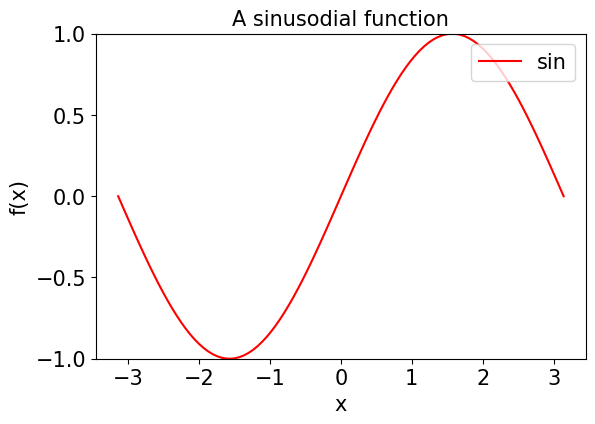

In [32]:
# clear any existing figures (if any)
plt.clf()

# define a new figure
fig  = plt.figure(figsize=(7, 5))
ax   = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=10)

# The axis labels are often cut off. We need to adjust the figure
plt.subplots_adjust(bottom=0.20)
plt.subplots_adjust(left=0.20)


# plot our data
ax.plot(x,y, color = 'red', label = 'sin')

# add the axis labels
ax.set_xlabel("x",fontsize=15)
ax.set_ylabel("f(x)",fontsize=15)

# if we need to, we can adjust the range at which the axis is shown
ax.set_ylim(bottom=-1.0)
ax.set_ylim(top=1.0)

# add the legend
# note that here we cannot use "fontsize" but need to pass a dictionary with properties
plt.legend(prop={'size': 15}, loc='upper right')

# add a title
ax.set_title('A sinusodial function', fontsize = 15)


# save and show the figure.
# Note: The order of these commands matters!
plt.show()
fig.savefig('sinus.png')


***Exercise***

Add a cosinus function to the plot such that the plot looks like below afterwards.

![](SinCos.png)

Now we do the same in Seaborn.

For such a relatively simple plot, it does not save us much effort, the legend is placed automatically and a bit better so that it doesn't get in the way of the data.
Adding the labels, however, is the same.

The advantage becomes more apparent when we do more complex plots at bit later \
To do that, we first need to look at [pandas](https://pandas.pydata.org) to work with structured data.


Text(0.5, 1.0, 'A sinusodial function')

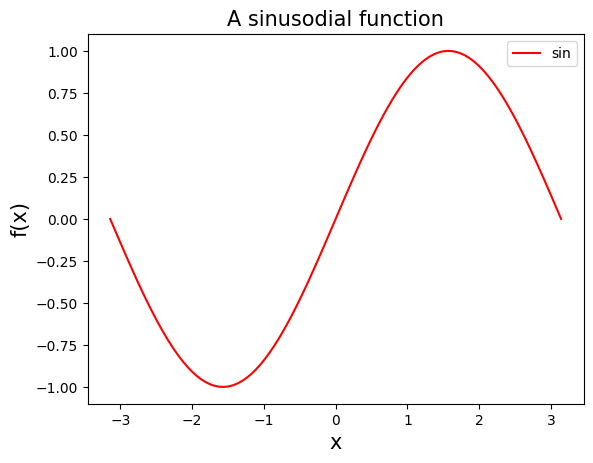

In [36]:
# Now we do the same in Seaborn
ax = sns.lineplot(x=x, y=y, label='sin', color='red')

ax.set_xlabel("x",fontsize=15)
ax.set_ylabel("f(x)",fontsize=15)
ax.set_title('A sinusodial function', fontsize = 15)



If we have only few data points, we can add markers to highlight each data point.
Let us assume, the sinus function would only be evaluated at 15 points instead of 100.

Text(0.5, 1.0, 'A sinusodial function')

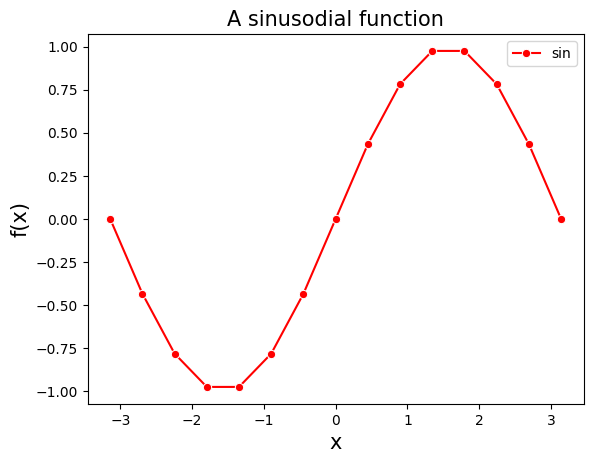

In [11]:
x = np.linspace(-np.pi, np.pi, 15)
y = np.sin(x)

ax = sns.lineplot(x=x, y=y, label='sin', color='red', markers=True, marker='o')

ax.set_xlabel("x",fontsize=15)
ax.set_ylabel("f(x)",fontsize=15)
ax.set_title('A sinusodial function', fontsize = 15)